# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (adjust path as necessary)

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge the data (using CustomerID to join)

In [3]:
data = pd.merge(transactions, customers, on="CustomerID")

# Convert TransactionDate to datetime

In [4]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# Create feature: Days since first transaction

In [5]:
data['DaysSinceFirstTransaction'] = (
    data['TransactionDate'] - data['TransactionDate'].min()
).dt.days

# Drop unnecessary columns

In [6]:
data = data.drop(columns=['TransactionDate'])

# Select relevant features for clustering

In [7]:
features = ['TotalValue', 'TransactionID', 'DaysSinceFirstTransaction']

# Scale features

In [8]:
print(data[features].dtypes)


TotalValue                   float64
TransactionID                 object
DaysSinceFirstTransaction      int64
dtype: object


In [9]:
from sklearn.preprocessing import StandardScaler

# Check and clean features
features = ['TotalValue', 'TransactionID', 'DaysSinceFirstTransaction']
print("Before cleaning:")
print(data[features].dtypes)
print(data[features].isnull().sum())

# Convert columns to numeric if necessary
for col in features:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values
data[features] = data[features].fillna(0)

# Scale features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

print("Scaling successful. Shape of scaled data:", data_scaled.shape)


Before cleaning:
TotalValue                   float64
TransactionID                 object
DaysSinceFirstTransaction      int64
dtype: object
TotalValue                   0
TransactionID                0
DaysSinceFirstTransaction    0
dtype: int64
Scaling successful. Shape of scaled data: (1000, 3)


# Clustering using KMeans

In [10]:
num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Calculate clustering metrics

In [11]:
db_index = davies_bouldin_score(data_scaled, data['Cluster'])
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])

# Print results

In [12]:
print(f"Number of clusters: {num_clusters}")

Number of clusters: 3


In [13]:
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.8092321837458051


In [14]:
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4178923169126942


# Visualize clusters using pairplot

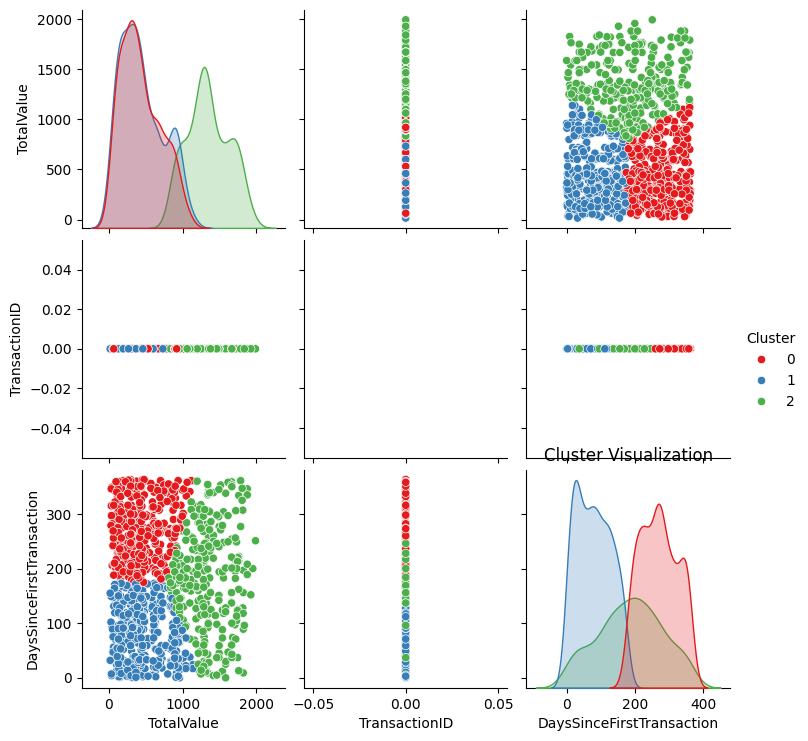

In [17]:
data['Cluster'] = data['Cluster'].astype(str)  # Convert cluster labels to string for plotting
sns.pairplot(data, vars=features, hue='Cluster', palette='Set1')
plt.title("Cluster Visualization")
plt.show()

# Save the clustered data to a new CSV file

In [19]:
data.to_csv("Clustered_Customers.csv", index=False)
print("Clustered data saved to 'Clustered_Customers.csv'")

Clustered data saved to 'Clustered_Customers.csv'
